In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
df=pd.read_csv('C:/Users/aksin52/Documents/Learnbay Stats ML Curriculum/diabetes.csv')

# Checking the data

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Split Dependent and Independent

In [3]:
X=df.drop(['Outcome'],axis=1)
Y=df[['Outcome']]

# Missing Value Check

In [5]:
#X.isnull().sum()/X.count()
X.isnull().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
dtype: float64

# Encoding categorical features

# Capping and Flooring of Outliers if Present

In [4]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [5]:
X=X.apply(lambda x: outlier_capping(x))
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.834635,121.272135,69.053385,20.433125,78.604427,31.936031,0.468461,33.205729
std,3.336808,30.807518,19.243340,15.646206,109.425722,7.712781,0.314849,11.645318
min,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.094680,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,13.000000,196.000000,106.000000,51.330000,519.900000,50.759000,1.698330,67.000000


In [ ]:
X.shape

# Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,Y, test_size=0.2,random_state=42)

# Check for randomness of train and test by testing the event rates across the two datasets

In [8]:
y_train.mean()

0.3500931098696462

In [9]:
y_test.mean()

0.3463203463203463

In [31]:
X_train.shape

(537, 8)

# Building the Random Forest Model

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,max_depth=7,random_state=0)
rf.fit(X_train,y_train)

C:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=7, n_estimators=200, random_state=0)

In [29]:
feature_importances=pd.DataFrame(rf.feature_importances_,index=X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Glucose,0.289647
BMI,0.170654
Age,0.153111
DiabetesPedigreeFunction,0.102573
Insulin,0.079022
BloodPressure,0.072596
Pregnancies,0.070208
SkinThickness,0.062189


# Making Class Predictions

In [30]:
y_pred=rf.predict(X_test)

# Model Evaluation

In [11]:
from sklearn import metrics

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))

Accuracy: 0.7402597402597403
Precision 0.631578947368421
Recall 0.6545454545454545
f1_score 0.6428571428571428


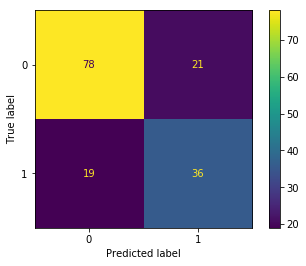

In [32]:
metrics.plot_confusion_matrix(rf,X_test,y_test)

In [33]:
metrics.roc_auc_score(y_test,y_pred)

0.7212121212121212

# Optimizing the Random Forest Model using Grid Search Method

In [27]:
np.random.seed(44)

from sklearn.model_selection import GridSearchCV

param_dist = {'max_depth': [3, 5, 6, 7],
              'min_samples_split': [10, 20, 30, 40],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy'],
              'n_estimators':[50,100,150,200,250]}

cv_rf = GridSearchCV(rf, cv = 10, param_grid=param_dist,n_jobs = 3)

cv_rf.fit(X_train,y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

KeyboardInterrupt: 

In [34]:
# Rebuilding the model with optimized Parameters
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier(random_state=0,n_estimators=200,bootstrap=False,max_depth=7,max_features='log2',min_samples_split=20)
rf1.fit(X_train,y_train)

# Feature Importances
feature_importances=pd.DataFrame(rf1.feature_importances_,index=X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances



C:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


,importance
Glucose,0.383393
BMI,0.179703
Age,0.169803
DiabetesPedigreeFunction,0.077440
Insulin,0.059717
BloodPressure,0.051717
Pregnancies,0.042715
SkinThickness,0.035511


In [35]:
# Making Predictions and checking Accuracy and other measures
y_pred=rf1.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))

Accuracy: 0.7467532467532467
Precision 0.6428571428571429
Recall 0.6545454545454545
f1_score 0.6486486486486486


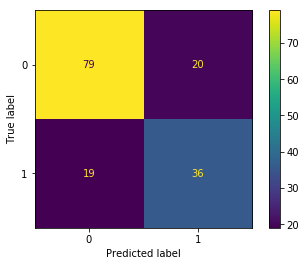

In [36]:
# plot the confusion matrix
metrics.plot_confusion_matrix(rf1,X_test,y_test)

In [37]:
# Area under the ROC Curve
metrics.roc_auc_score(y_test,y_pred)

0.7262626262626263

# Visualizing the Model Performance - Lorenz Curve

In [38]:
y_pred_prob = rf.predict_proba(X)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank_RF']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df.groupby('P_Rank_RF')['Outcome'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,77,0.987013,76.0,76.0,0.283582,0.283582,0.100260,0.100260,1,2.828455
1,9,77,0.948052,73.0,149.0,0.272388,0.555970,0.100260,0.200521,2,2.772630
2,8,77,0.805195,62.0,211.0,0.231343,0.787313,0.100260,0.300781,3,2.617562
3,7,76,0.486842,37.0,248.0,0.138060,0.925373,0.098958,0.399740,4,2.314940
4,6,77,0.181818,14.0,262.0,0.052239,0.977612,0.100260,0.500000,5,1.955224
5,5,77,0.025974,2.0,264.0,0.007463,0.985075,0.100260,0.600260,6,1.641079
6,4,76,0.026316,2.0,266.0,0.007463,0.992537,0.098958,0.699219,7,1.419495
7,3,77,0.012987,1.0,267.0,0.003731,0.996269,0.100260,0.799479,8,1.246147
8,2,77,0.012987,1.0,268.0,0.003731,1.000000,0.100260,0.899740,9,1.111433
9,1,77,0.000000,0.0,268.0,0.000000,1.000000,0.100260,1.000000,10,1.000000


In [55]:
df_selected=df.loc[df['P_Rank_RF']>=8,:]
df_selected['Outcome'].mean()

0.9134199134199135

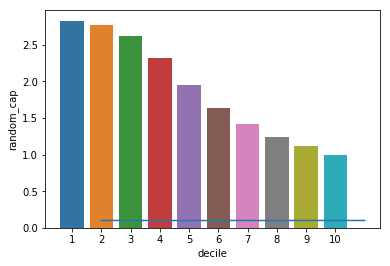

In [39]:
ax = sns.barplot( x="decile", y="lift_over_random", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="random_cap", data=sorted_reindexed)

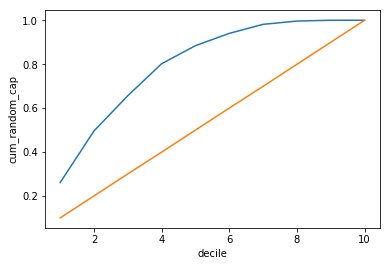

In [46]:
ax = sns.lineplot( x="decile", y="cum_event_cap", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="cum_random_cap", data=sorted_reindexed)